In [34]:
#install.packages("klaR",dependencies=TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [35]:
#install.packages("AlgDesign",dependencies=TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [36]:
#install.packages("agricolae",dependencies=TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [37]:
#library(agricolae)

In [38]:
#install.packages("multcomp",dependencies=TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [39]:
library(multcomp)
library(repr)
library(RColorBrewer)

In [41]:
setwd("~/Documents/UCDavis/dib/MMETSP")

In [42]:
special_flowers = c("MMETSP0693","MMETSP1019","MMETSP0923","MMETSP0008","MMETSP1002","MMETSP1325","MMETSP1018",
                    "MMETSP1346","MMETSP0088","MMETSP0092","MMETSP0717","MMETSP0223","MMETSP0115","MMETSP0196",
                    "MMETSP0197","MMETSP0398","MMETSP0399","MMETSP0922")
tax_raw <- read.csv("assembly_evaluation_data/MMETSP_all_evaluation_matrix.csv")

In [54]:
tax_raw <- tax_raw[!tax_raw$SampleName %in% special_flowers,]
# restrict to Unique_kmers, Phylum, n_seqs, Input.Reads, mean_orf_percent.x
phylum_data <-tax_raw[,c(2,34,41,45,54,266,271,283)]
phylum <- phylum_data$Phylum
# Restrict data to top 7 most common Phyla
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")
sub<-phylum_data[phylum_data$Phylum %in% sub_phy,]
colors=rainbow(length(sub_phy))

## Mean %ORF

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = mean_orf_percent ~ Phylum, data = sub)

Linear Hypotheses:
                                   Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0  -0.9613     1.0905  -0.882  0.97276    
Ciliophora - Bacillariophyta == 0  -20.7047     1.5669 -13.214  < 0.001 ***
Cryptophyta - Bacillariophyta == 0   6.1667     1.6576   3.720  0.00377 ** 
Dinophyta - Bacillariophyta == 0    10.8851     0.8882  12.256  < 0.001 ***
Haptophyta - Bacillariophyta == 0    4.8356     1.0905   4.434  < 0.001 ***
Ochrophyta - Bacillariophyta == 0    3.0753     1.0221   3.009  0.03981 *  
Ciliophora - Chlorophyta == 0      -19.7433     1.7391 -11.353  < 0.001 ***
Cryptophyta - Chlorophyta == 0       7.1280     1.8213   3.914  0.00186 ** 
Dinophyta - Chlorophyta == 0        11.8464     1.1654  10.165  < 0.001 ***
Haptophyta - Chlorophyta == 0        5.7969     1.3260   4.3

pdf 
  2

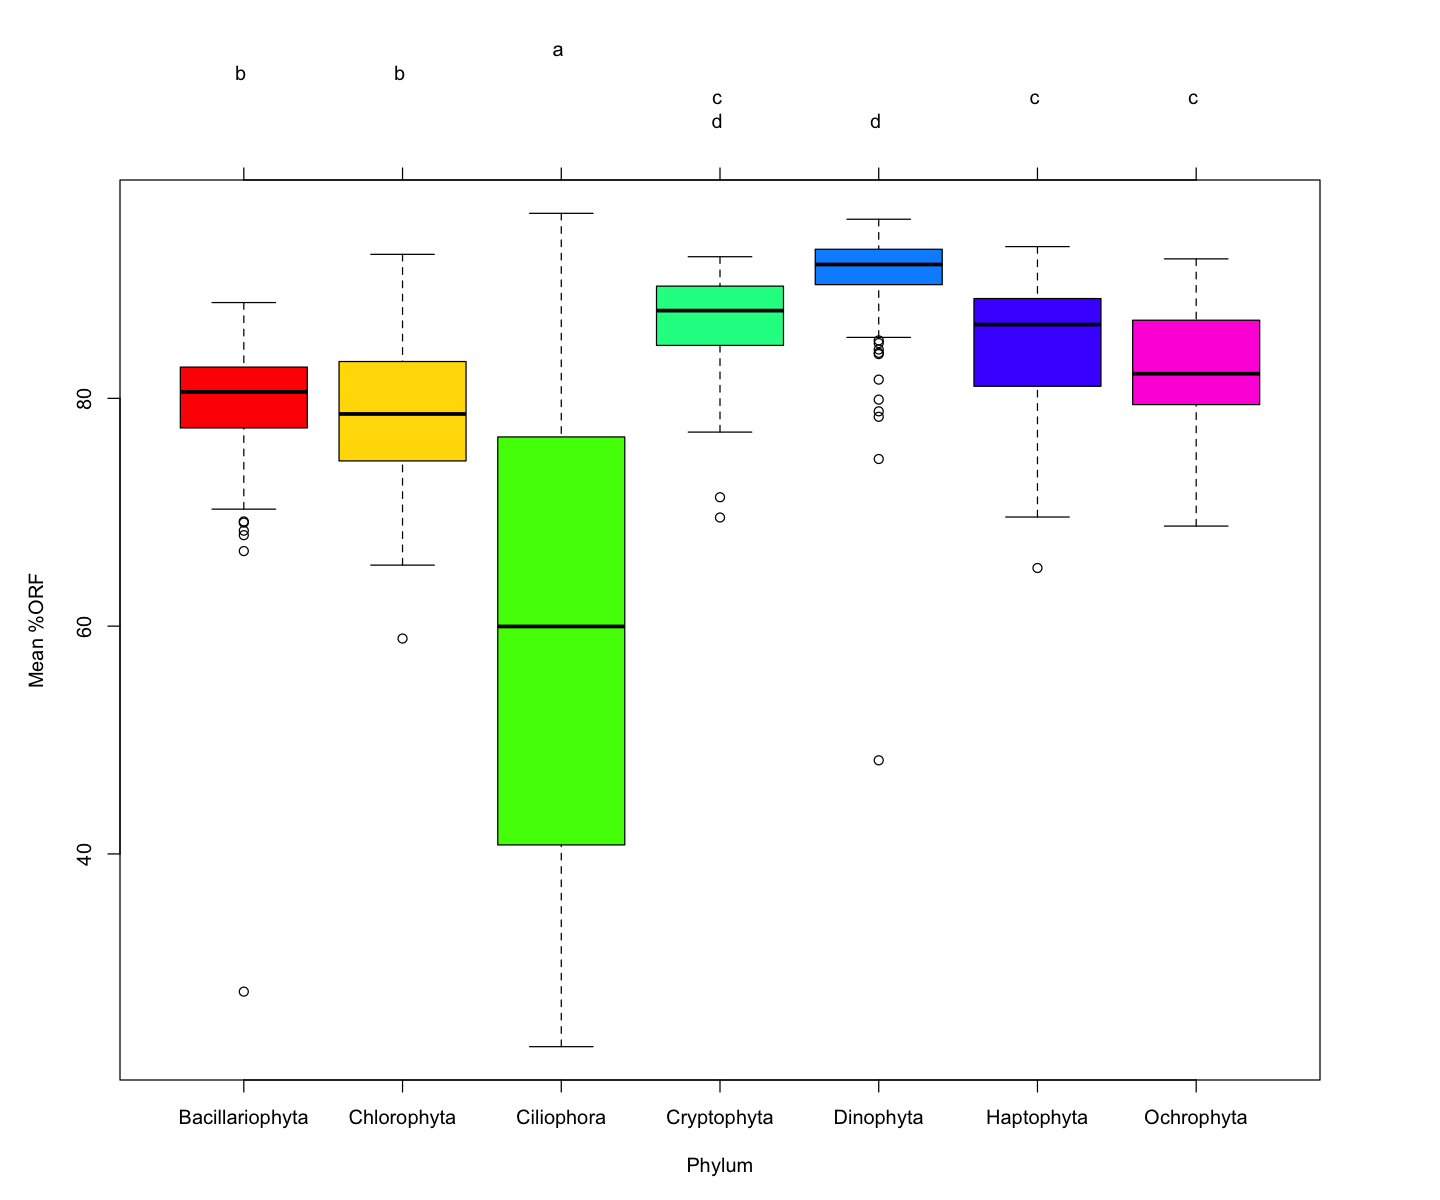

In [51]:
fit <- aov(mean_orf_percent ~ Phylum,data=sub)
a<-HSD.test(fit,"Phylum",group=TRUE)
tuk<-glht(fit,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.a<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_unique_kmers.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_unique_kmers.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.a,col=colors,ylab="Mean %ORF")
dev.off()
plot(tuk.cld.a,col=colors,ylab="Mean %ORF")

# Unique k-mers


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = mean_orf_percent ~ Phylum, data = sub)

Linear Hypotheses:
                                   Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0  -0.9613     1.0905  -0.882  0.97277    
Ciliophora - Bacillariophyta == 0  -20.7047     1.5669 -13.214  < 0.001 ***
Cryptophyta - Bacillariophyta == 0   6.1667     1.6576   3.720  0.00388 ** 
Dinophyta - Bacillariophyta == 0    10.8851     0.8882  12.256  < 0.001 ***
Haptophyta - Bacillariophyta == 0    4.8356     1.0905   4.434  < 0.001 ***
Ochrophyta - Bacillariophyta == 0    3.0753     1.0221   3.009  0.03942 *  
Ciliophora - Chlorophyta == 0      -19.7433     1.7391 -11.353  < 0.001 ***
Cryptophyta - Chlorophyta == 0       7.1280     1.8213   3.914  0.00174 ** 
Dinophyta - Chlorophyta == 0        11.8464     1.1654  10.165  < 0.001 ***
Haptophyta - Chlorophyta == 0        5.7969     1.3260   4.3

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

pdf 
  2

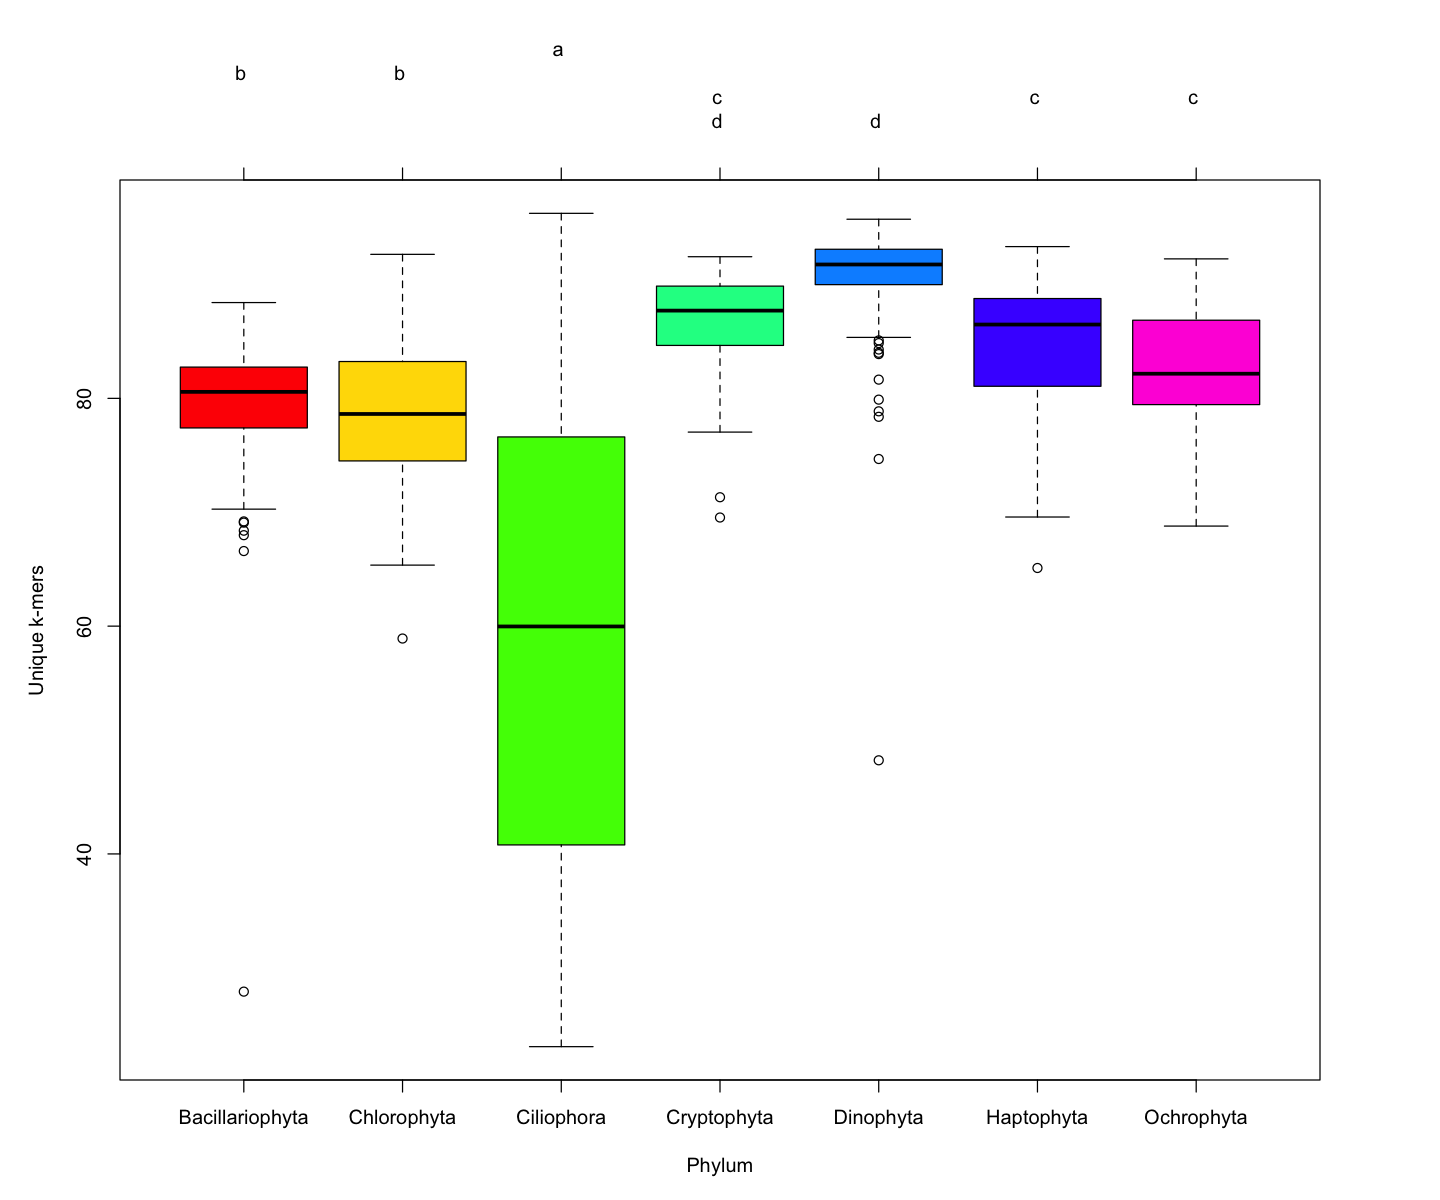

In [45]:
fit2 <- aov(mean_orf_percent ~ Phylum,data=sub)
b<-TukeyHSD(fit2,"Phylum",conf.level=0.95)
tuk<-glht(fit2,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.b<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_mean_orf.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_mean_org.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.b,col=colors)
dev.off()
plot(tuk.cld.b,col=colors, ylab="Unique k-mers")

# Number of Input reads

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = Input.Reads ~ Phylum, data = sub)

Linear Hypotheses:
                                   Estimate Std. Error t value Pr(>|t|)   
Chlorophyta - Bacillariophyta == 0  -282548    1077256  -0.262  0.99997   
Ciliophora - Bacillariophyta == 0   3976394    1547884   2.569  0.12752   
Cryptophyta - Bacillariophyta == 0  3439725    1637502   2.101  0.33542   
Dinophyta - Bacillariophyta == 0    1413547     872699   1.620  0.65151   
Haptophyta - Bacillariophyta == 0  -2160043    1077256  -2.005  0.39308   
Ochrophyta - Bacillariophyta == 0  -2100984    1009676  -2.081  0.34684   
Ciliophora - Chlorophyta == 0       4258942    1717960   2.479  0.15698   
Cryptophyta - Chlorophyta == 0      3722273    1799126   2.069  0.35401   
Dinophyta - Chlorophyta == 0        1696095    1147626   1.478  0.74261   
Haptophyta - Chlorophyta == 0      -1877495    1309932  -1.433  0.76919   


Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

pdf 
  2

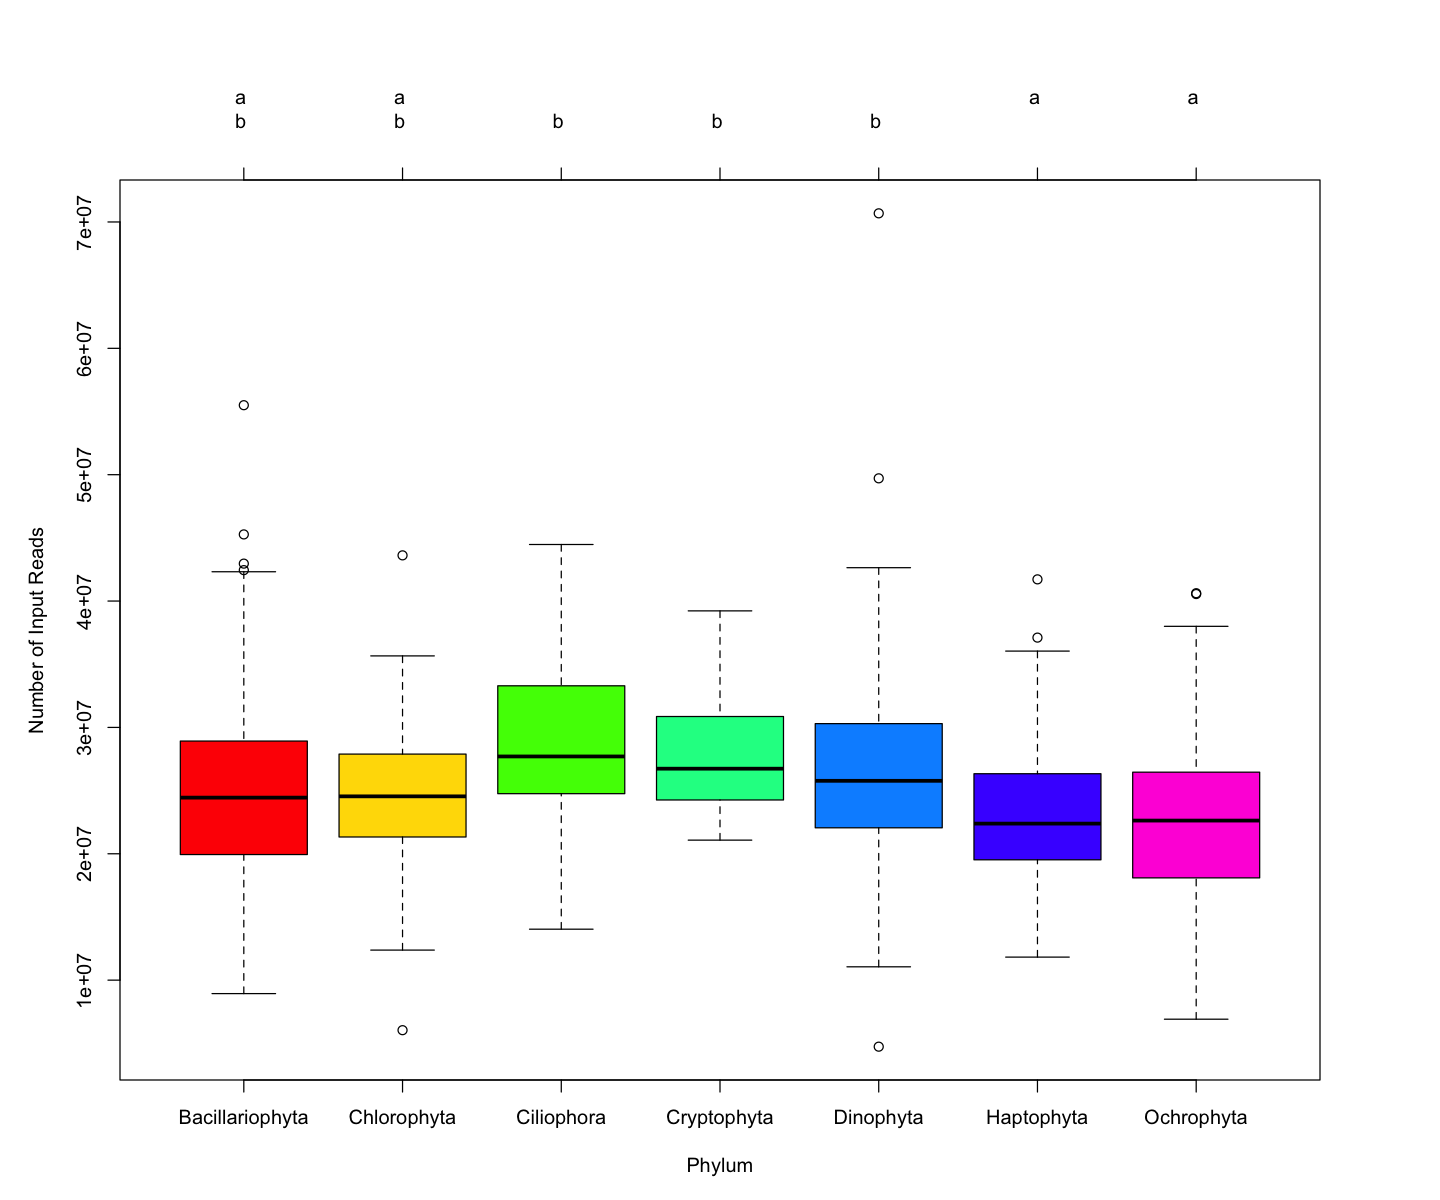

In [46]:
fit3 <- aov(Input.Reads ~ Phylum,data=sub)
b<-TukeyHSD(fit3,"Phylum",conf.level=0.95)
tuk<-glht(fit3,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.c<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_input_Reads.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_input_Reads.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.c,col=colors)
dev.off()
plot(tuk.cld.c,col=colors, ylab="Number of Input Reads")

# Number of contigs

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = n_seqs ~ Phylum, data = sub)

Linear Hypotheses:
                                   Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0 -10604.3     3994.2  -2.655  0.10336    
Ciliophora - Bacillariophyta == 0   15625.9     5739.2   2.723  0.08702 .  
Cryptophyta - Bacillariophyta == 0  25057.4     6071.4   4.127  < 0.001 ***
Dinophyta - Bacillariophyta == 0    63580.8     3253.1  19.545  < 0.001 ***
Haptophyta - Bacillariophyta == 0    9305.3     3994.2   2.330  0.21753    
Ochrophyta - Bacillariophyta == 0     228.8     3743.6   0.061  1.00000    
Ciliophora - Chlorophyta == 0       26230.2     6369.8   4.118  < 0.001 ***
Cryptophyta - Chlorophyta == 0      35661.7     6670.7   5.346  < 0.001 ***
Dinophyta - Chlorophyta == 0        74185.1     4268.3  17.380  < 0.001 ***
Haptophyta - Chlorophyta == 0       19909.5     4856.9   4.099  < 0.00

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

pdf 
  2

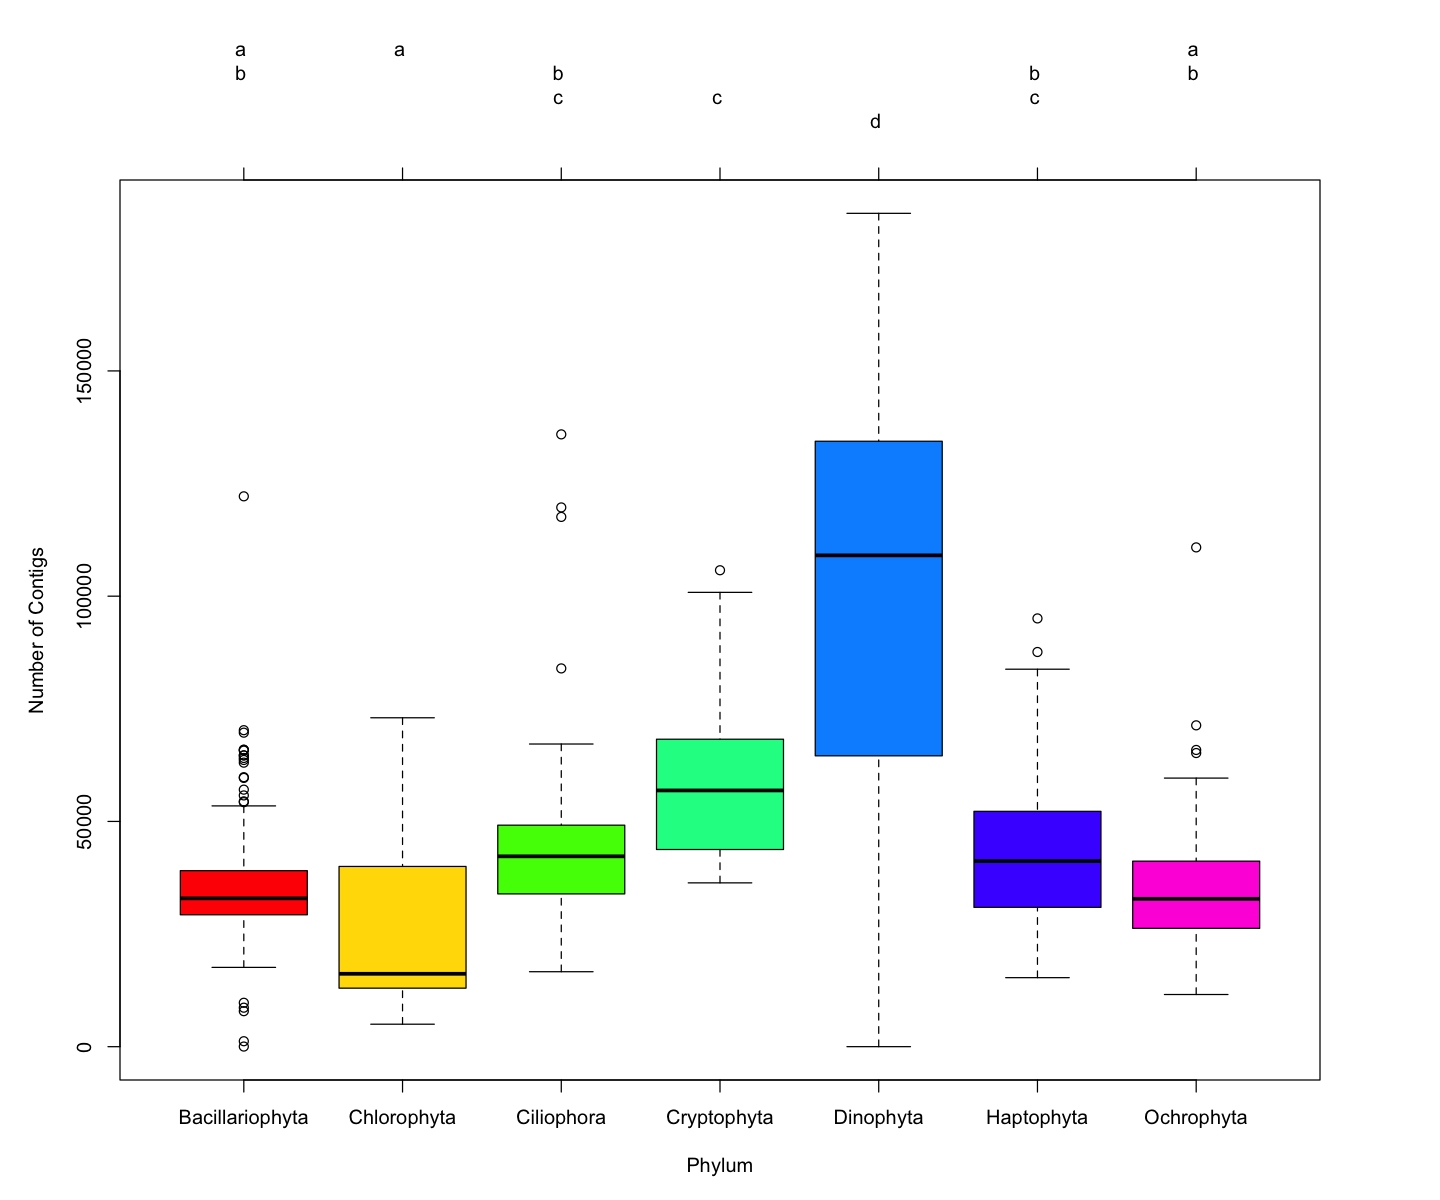

In [47]:
fit4 <- aov(n_seqs ~ Phylum,data=sub)
b<-TukeyHSD(fit4,"Phylum",conf.level=0.95)
tuk<-glht(fit4,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.d<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_n_contigs.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_n_contigs.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.d,col=colors)
dev.off()
plot(tuk.cld.d,col=colors, ylab="Number of Contigs")

# BUSCO

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = DIB.Complete_eukaryotic_BUSCO_perc ~ Phylum, data = sub)

Linear Hypotheses:
                                   Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0  12.4198     2.5935   4.789   <0.001 ***
Ciliophora - Bacillariophyta == 0    0.7864     3.7489   0.210   1.0000    
Cryptophyta - Bacillariophyta == 0   2.6262     3.9660   0.662   0.9939    
Dinophyta - Bacillariophyta == 0    -4.6902     2.1250  -2.207   0.2764    
Haptophyta - Bacillariophyta == 0   -4.8008     2.6091  -1.840   0.5017    
Ochrophyta - Bacillariophyta == 0   -3.6362     2.4454  -1.487   0.7372    
Ciliophora - Chlorophyta == 0      -11.6333     4.1511  -2.803   0.0705 .  
Cryptophyta - Chlorophyta == 0      -9.7936     4.3481  -2.252   0.2532    
Dinophyta - Chlorophyta == 0       -17.1100     2.7735  -6.169   <0.001 ***
Haptophyta - Chlorophyta == 0      -17.220

pdf 
  2

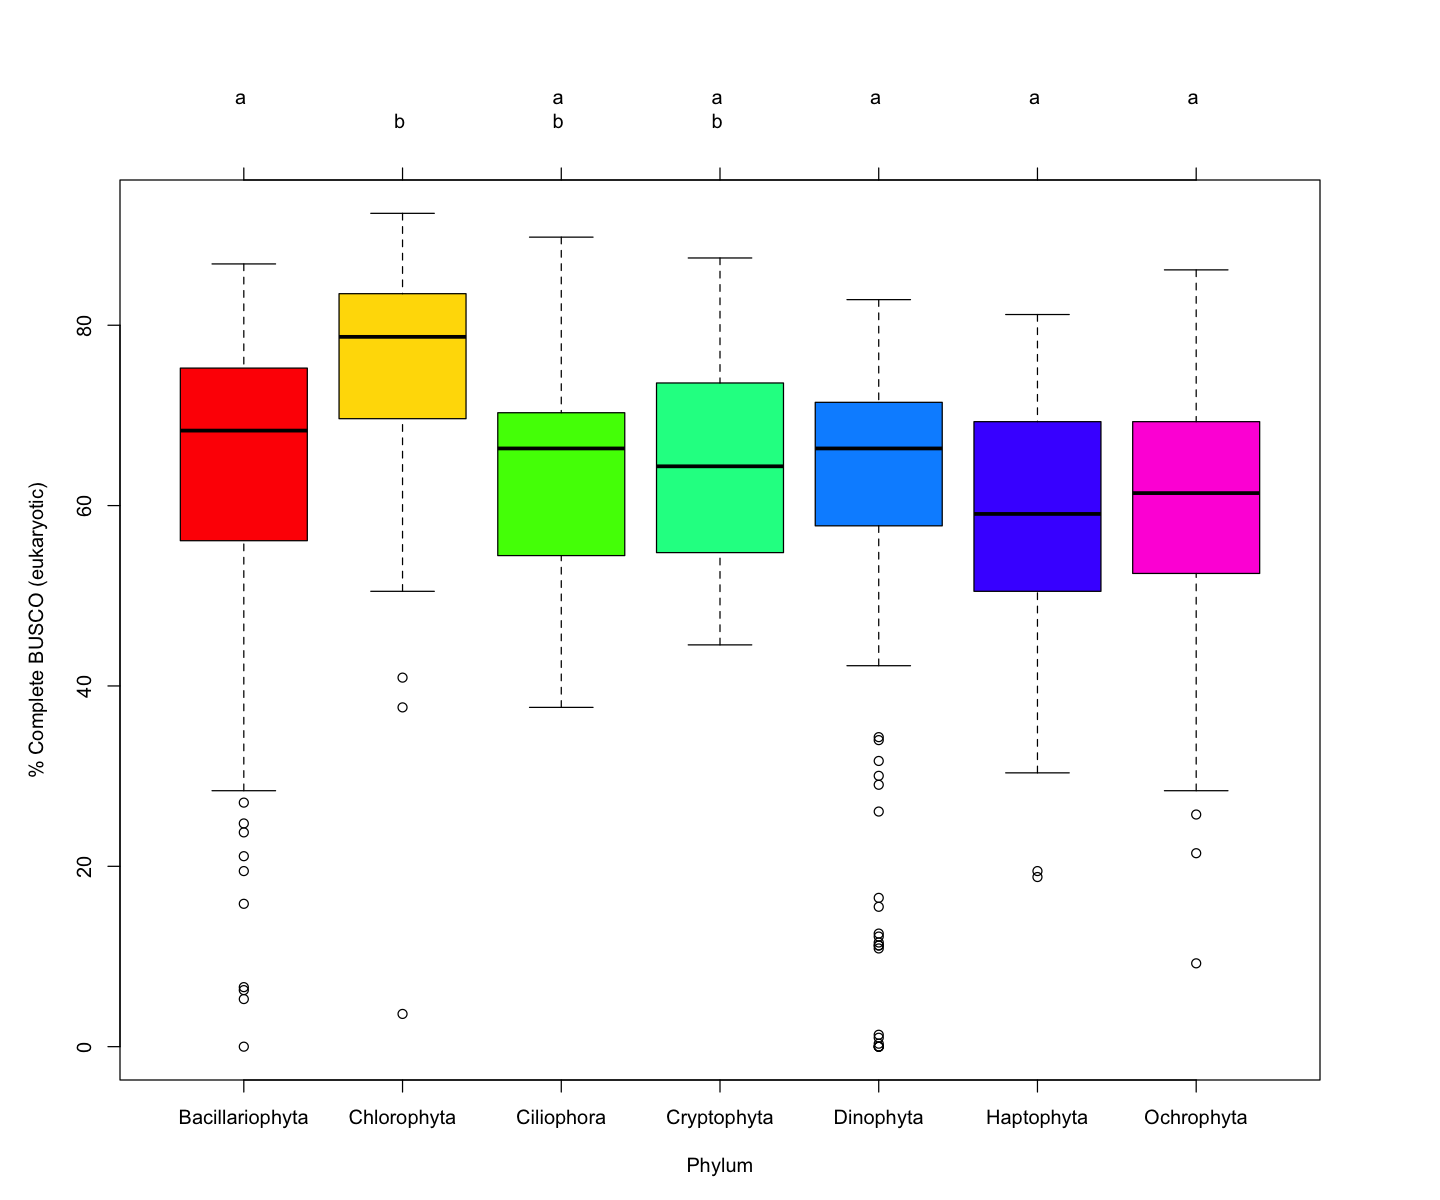

In [53]:
fit5 <- aov(DIB.Complete_eukaryotic_BUSCO_perc ~ Phylum,data=sub)
b<-TukeyHSD(fit5,"Phylum",conf.level=0.95)
tuk<-glht(fit5,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.e<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_BUSCO.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_BUSCO.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.e,col=colors)
dev.off()
plot(tuk.cld.e,col=colors, ylab="% Complete BUSCO (eukaryotic)")

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = DIB.Complete_protist_BUSCO_prop ~ Phylum, data = sub)

Linear Hypotheses:
                                    Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0  0.066156   0.026076   2.537  0.13786    
Ciliophora - Bacillariophyta == 0  -0.006772   0.037694  -0.180  1.00000    
Cryptophyta - Bacillariophyta == 0 -0.035475   0.039876  -0.890  0.97151    
Dinophyta - Bacillariophyta == 0   -0.025735   0.021366  -1.204  0.88378    
Haptophyta - Bacillariophyta == 0  -0.068555   0.026233  -2.613  0.11492    
Ochrophyta - Bacillariophyta == 0  -0.039429   0.024587  -1.604  0.66247    
Ciliophora - Chlorophyta == 0      -0.072928   0.041737  -1.747  0.56502    
Cryptophyta - Chlorophyta == 0     -0.101630   0.043718  -2.325  0.21958    
Dinophyta - Chlorophyta == 0       -0.091890   0.027887  -3.295  0.01644 *  
Haptophyta - Chlorophyta == 0      

pdf 
  2

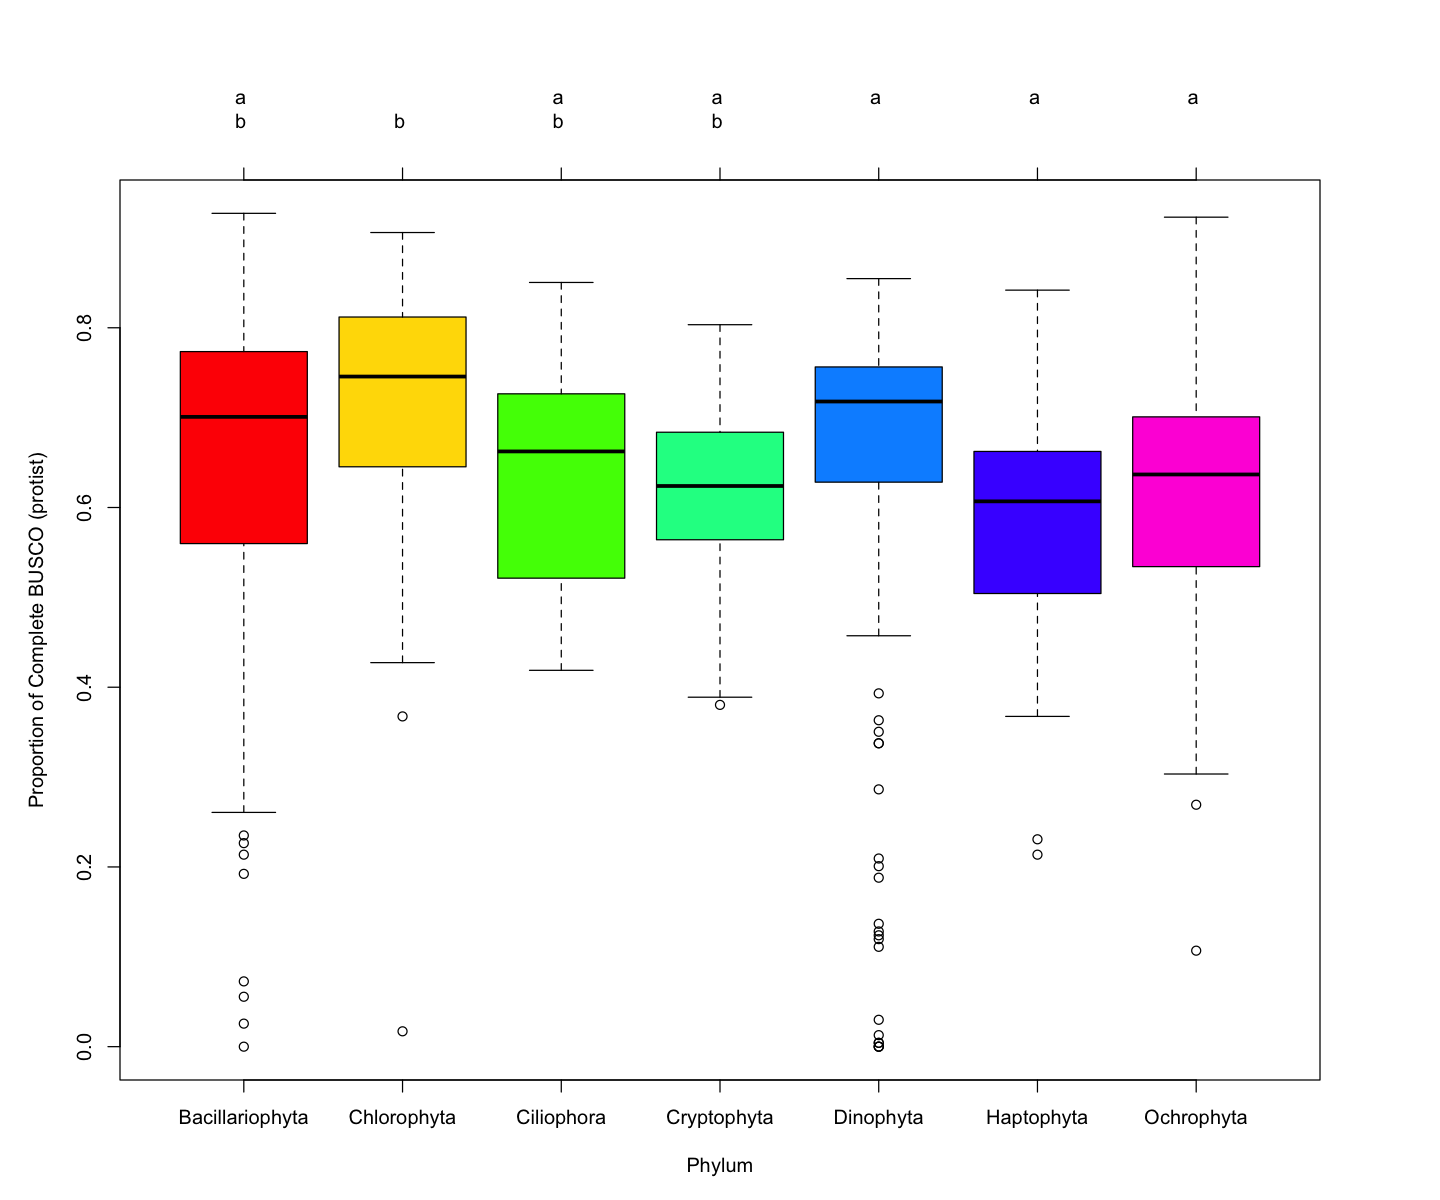

In [55]:
fit6 <- aov(DIB.Complete_protist_BUSCO_prop ~ Phylum,data=sub)
b<-TukeyHSD(fit6,"Phylum",conf.level=0.95)
tuk<-glht(fit6,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.f<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_BUSCO_protist.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_BUSCO_protist.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.f,col=colors)
dev.off()
plot(tuk.cld.f,col=colors, ylab="Proportion of Complete BUSCO (protist)")

pdf 
  2

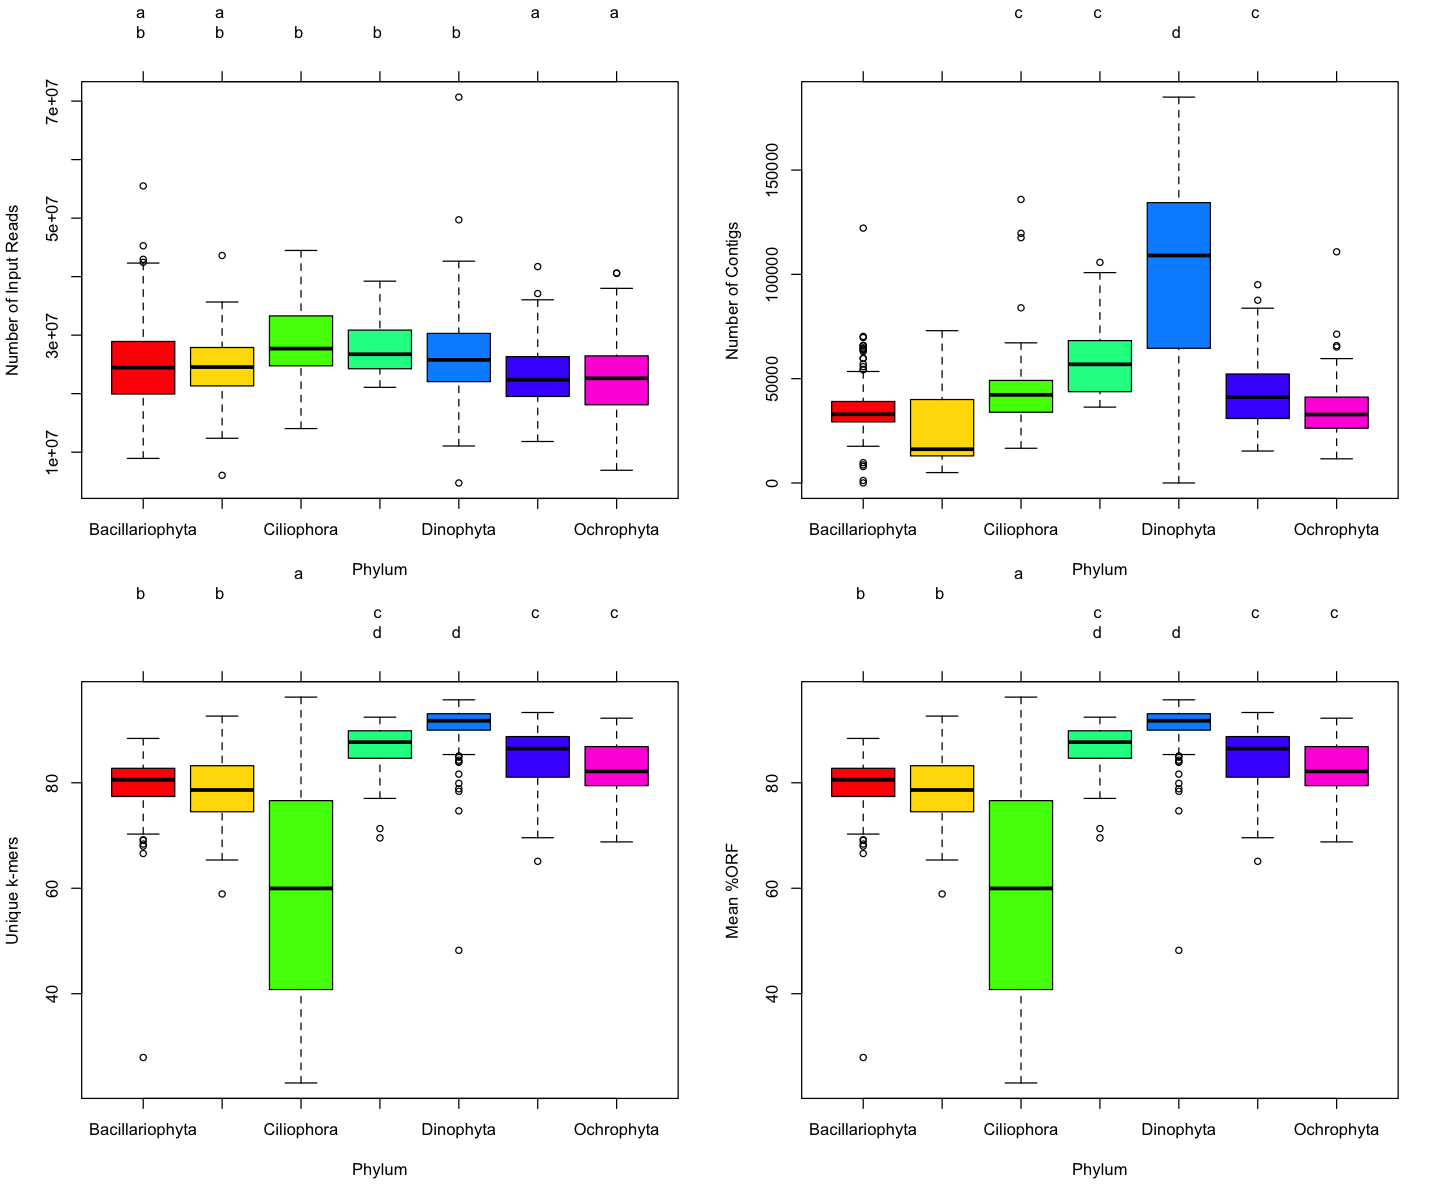

In [58]:
par(mfrow=c(2,2))
pdf("paper/Figure8_all.pdf", width=8.5, height=11)
png("paper/Figure8_all.png", width=8.5, height=11,unit='in',res=1200)
plot(tuk.cld.c,col=colors, ylab="Number of Input Reads")
plot(tuk.cld.d,col=colors, ylab="Number of Contigs")
plot(tuk.cld.b,col=colors, ylab="Unique k-mers")
plot(tuk.cld.a,col=colors,ylab="Mean %ORF")
dev.off()
plot(tuk.cld.c,col=colors, ylab="Number of Input Reads")
plot(tuk.cld.d,col=colors, ylab="Number of Contigs")
plot(tuk.cld.b,col=colors, ylab="Unique k-mers")
plot(tuk.cld.a,col=colors,ylab="Mean %ORF")